¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## La fiebre de los videojuegos!

En este proyecto analizaremos un data set de videojuegos que nos ayudará a identificar y obtener reultados con respecto a los patrones  que determinen si un juego tiene éxito o no. Gracias a estos resultados sabremos sin un futuro proyectos prometedores y como planificar campañas publicitarias.

## Paso 1. Inicialización

In [1]:
# Cargar la librerías correspondientes.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

### Cargar datos

Abrir el archivo de datos y estudiar la información general

In [2]:
df_games = pd.read_csv('games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bie, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

## Paso 2. Prepara los datos.

Visualización de los datos para asegurarnos que cargaron correctamente y como están elaboradas

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3949,Avatar: The Last Airbender,GC,2006.0,Adventure,0.39,0.10,0.00,0.01,60.0,6.5,E10+
10709,Real Bout Garou Densetsu,SAT,1996.0,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN
14849,Kuryuu Youma Gakuenki Recharge,PS2,2006.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14066,Trick x Logic: Season 2,PSP,2010.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
1457,Monster Hunter Freedom,PSP,2005.0,Role-Playing,0.24,0.03,1.03,0.04,71.0,8.6,T
12989,Rockin' Pretty,DS,2009.0,Misc,0.05,0.00,0.00,0.00,NaN,tbd,E
7973,Godzilla (2015),PS4,2014.0,Action,0.11,0.03,0.02,0.03,NaN,NaN,NaN
3844,Mission: Impossible,PS,1999.0,Action,0.29,0.20,0.00,0.03,NaN,NaN,NaN
11878,Spot Goes to Hollywood,PS,1996.0,Platform,0.04,0.03,0.00,0.00,NaN,NaN,NaN
10095,Zangeki no Reginleiv,Wii,2010.0,Action,0.00,0.00,0.11,0.00,NaN,NaN,NaN


De primera instancia observamos que las columnas no están en el formato adecuado por lo que hay que cambiar las columnas a minúsculas y los valores de la columna del año de lanzamiento deberían estar en formato `int`, este aspecto los cambiaremos más adelante.

In [5]:
df_games.columns = df_games.columns.str.lower()

#### Obresvamos la información general de la tabla.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

La tabla cuenta con una dimensión de 16 715 filas x 11 columnas; El data es algo chico, no tan grande. De la cual, 6 columnas cuentan con valores nulos. Las columnas son `name`, `year_of_release`, `genre`, `critic_score`, `user_score` & `rating`. Los tipos de valores que se encuentran en el dataset son de tipo `object` (5 columnas) & `float64` (6 columnas).

Observaremos si es posible llenar los valores nulos.

#### Sustituir valores nulos.

Veremos si se pueden sustuir los valores nulos con algún valor de tipo `object` o `float64`. La columnas `name` y `genre` son la únicas columnas con valores de tipo `object` que tienen valores nulos. En la columna `name`, difícilmente podríamos saber los nombres ausentes de los 2 videojuegos, podríamos quitar o no estos datos ya que solo corresponden el 0.00011 % del dataset. Decidimos no retirarlos y proporcionarles el nombre `Unknown`. Caso parecido a la columna `genre`, solo hay dos videjuegos que no tienen declarado su género. Si no es uno de los viejuegos desconocidos, podríamos hacer una búsqueda de esos 2 juegos para saber de que género son, de lo contrario, proprocionarles el nombre de `Unknown`. En las columnas restantes es importante decidir si vamos a utilizar la `media` o la `mediana` para llenar los valores nulos. Para decidir este aspecto observaremos tanto la `media` como `mediana` con la descripción estadística general. O simplemente dejarlos vacíos.

Los datos probablemente están vacíos por tres posibles factores:

- El usuario no proporciono esa información.
- El administrador la base de datos no lleno esos valores.
- Se borraron inportunamente.

In [7]:
df_games['name'] = df_games['name'].fillna('Unkown')
df_games.query("name == 'Unkown'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unkown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unkown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Tuvimos como resultado que el videojuego desconocido es el que tiene el género con valor nulo.

#### Descripción estadística.

In [8]:
# Observación de la información general estadística. 
df_games.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16715,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11560,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


En la descripción estadística podemos observar varios resultados interesantes.

-   El videojuego que aparece con más frecuancia es `Need for Speed: Most Wanted`, fue el juego multiconsola más vendido durante el registro del año 2016.
-   La consola PS2 se convirtió en la plataforma más vendidas en la historia de las consolas de lo videojuegos.
-   Los jugadores prefieren los juegos de acción.
-   Es curioso que el valor que más frecuente se repite, en la columna `user_score`, es `tbd` (To be determined) ¿Será que se les olvidó poner al calificación? Los podemos rellenar con la mediana o moda de los que si están calificados.
-   La valores de la columna `year_of_release` están como tipo `float64`. No podemos cambiar los valores a `int64` por tener valors nulos. No los sustituiremos para no causar alguna clase de sesgo e información incorrecta.
-   Hay videojuegos registrados desde el año 1980.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del método describe para explorar las variables, también me gustaron tus comentarios detallando lo observado en la tabla.
</div>

#### Cambiar el valor tbd a cero.

In [9]:
user_score = df_games[~(df_games['user_score'] == 'tbd') & ~(df_games['user_score'].isnull())]['user_score']
user_score = user_score.astype('float64')
mean_user_score = user_score.mean()
median_user_score = user_score.median()
print(f"La media de la calificación de los jugadores es de {mean_user_score:0.2f}")
print(f"La mediana de la calificación de los jugadores es de {median_user_score:0.2f}\n")
print(user_score.describe())

La media de la calificación de los jugadores es de 7.13
La mediana de la calificación de los jugadores es de 7.50

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


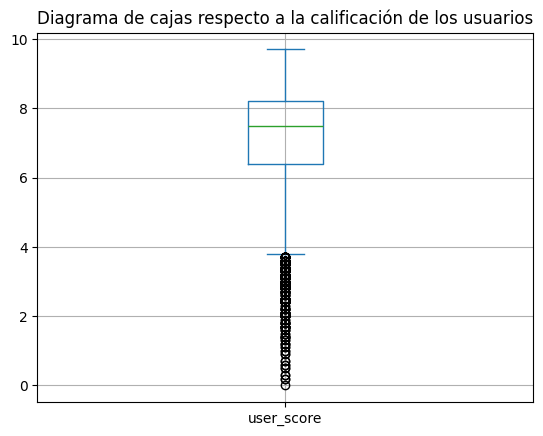

In [10]:
user_score.plot.box(title="Diagrama de cajas respecto a la calificación de los usuarios")
plt.grid(True)
plt.show()

Tomaremos la mediana como función matemática para sustituir todos lo valores `tbd` y `NaN` ya que, como podemos observar en el diagrama de cajas, tenemos valores atípicos. Igualmenteobservamos que el primer, segundo y tercer cuartil son 6.4, 7.5 y 8.2, respectivamente. Todo esto se calculo sin tomar los valores `tbs` y `NaN`.

In [11]:
df_games['user_score'] = df_games['user_score']\
    .where(~((df_games['user_score'] == 'tbd') | (df_games['user_score'].isnull())),str(median_user_score))
df_games['user_score'] = df_games['user_score'].astype('float64')


In [12]:
df_games.describe()['user_score']

count    16715.00000
mean         7.32974
std          1.02785
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: user_score, dtype: float64

Observamos que al sustuir los valores `tbd` y `nan` la mayoría de loa datos se encuentran en 7.5, valor que calculamos como mediana.

#### Sustitiur los valores `NaN` de la columna `critic_score`.

In [13]:
df_games[~(df_games['critic_score'].isnull())]['critic_score']

0        76.0
2        82.0
3        80.0
6        89.0
7        58.0
         ... 
16696    61.0
16697    53.0
16698    48.0
16702    60.0
16705    63.0
Name: critic_score, Length: 8137, dtype: float64

In [14]:
critic_score = df_games[~(df_games['critic_score'].isnull())]['critic_score']
critic_score_mean = critic_score.mean()
critic_score_median = critic_score.median()
print(f"La media de la calificación de la crítica es de {critic_score_mean}")
print(f"La mediana de la calificación de la crítica es de {critic_score_median}\n")
print(critic_score.describe())

La media de la calificación de la crítica es de 68.96767850559173
La mediana de la calificación de la crítica es de 71.0

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


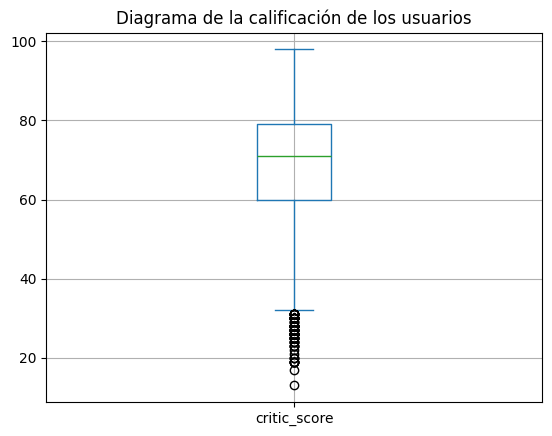

In [15]:
critic_score.plot.box(title="Diagrama de la calificación de los usuarios")
plt.grid(True)
plt.show()

Mismo caso que en `user_score`, tomaremos le media de `critic_score` para llenar los valores ausentes.

In [16]:
df_games['critic_score'] = df_games['critic_score'].fillna(critic_score_median)
df_games['critic_score'] = df_games['critic_score']/10 #Cambiarlo  a escala de 10
df_games['critic_score']

0        7.6
1        7.1
2        8.2
3        8.0
4        7.1
        ... 
16710    7.1
16711    7.1
16712    7.1
16713    7.1
16714    7.1
Name: critic_score, Length: 16715, dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, pero en algunos casos cambiar un valor nulo o en este caso un tbd (To Be Determined) a un 0 puede generar sesgos en los datos, por ejemplo la media y mediana va a disminuir drasticamente y si se hace en otro tipo de columnas puede crear problemas por ejemplo en una tabla de usuarios completar los nulos de la columna edad puede hacer creer que los usuarios son más jovenes porque disminuye la media del grupo.
    
En casos como estos es mejor cambiar por la mediana del grupo para evitar sesgos.
</div>

#### Eliminiar las filas donde los valores `year_of_release` sean `Nan` y pasar los valores a `int64`.

Corregir ya que el aplicar la función `delete_columns()` removemos muchas columnas que no tienen la información del año en el que fue lanzado el juego.

In [17]:
def delete_columns(data):
    index_nan_values = data[data['year_of_release'].isnull()].index
    data = data.drop(index=index_nan_values).reset_index(drop=True)
    data['year_of_release'] = data['year_of_release'].astype('int64')
    return data
    

In [18]:
df_games = delete_columns(df_games)

In [19]:
df_games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,7.7,7.9,E
10441,Bee Movie Game,PS2,2007,Action,0.05,0.04,0.00,0.01,6.5,7.5,E
10204,Mace Griffin: Bounty Hunter,XB,2003,Shooter,0.08,0.02,0.00,0.00,6.4,8.2,M
14373,Star Wars: The Force Unleashed II,PC,2010,Action,0.03,0.00,0.00,0.00,5.9,5.8,T
2586,Golden Sun: Dark Dawn,DS,2010,Role-Playing,0.51,0.09,0.13,0.05,7.9,8.1,E10+
12067,The Tale of Despereaux,DS,2008,Platform,0.06,0.00,0.00,0.00,7.5,7.5,E
2018,Wall-E,Wii,2008,Platform,0.51,0.40,0.00,0.11,5.1,3.6,E
7642,Breath of Fire: Dragon Quarter,PS2,2002,Role-Playing,0.09,0.07,0.00,0.02,7.8,6.9,T
9767,SimAnimals Africa,Wii,2009,Simulation,0.10,0.01,0.00,0.01,5.3,7.5,E
7481,Body Harvest,N64,1998,Shooter,0.16,0.04,0.00,0.00,7.1,7.5,NaN


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, aunque se pierden bastante filas en donde el año de lanzamiento no es conocido, algo que se puede hacer es salvar la mayoría de estos datos. Por ejemplo, agrupa los datos por consola y calcula la moda del año de lanzamiento por consola y puedes imputar este valor a los registros faltante. Por ejemplo, si la mayoría de los juegos de PS2 salieron en 2003 se asigna el valor 2003 a los juegos de PS2 que no tienen este dato. De esta forma se salvan estos datos de ser eliminados.
</div>

#### Ventas totales.

Calcular las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [20]:
def total_sales(row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    
    t_sales = na_sales + eu_sales + jp_sales + other_sales
    
    return t_sales

In [21]:
df_games['total_sales'] = df_games.apply(total_sales,axis=1)

In [22]:
df_games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2348,Spec Ops: Ranger Elite,PS,2001,Shooter,0.49,0.33,0.00,0.06,4.8,6.6,T,0.88
8524,Rudolph the Red-Nosed Reindeer,DS,2010,Action,0.15,0.00,0.00,0.01,7.1,7.5,E,0.16
4198,WWE SmackDown vs. Raw 2011,Wii,2010,Fighting,0.29,0.13,0.00,0.04,7.2,7.5,T,0.46
10706,Johnny Bravo in The Hukka-Mega-Mighty-Ultra-Ex...,DS,2009,Action,0.09,0.00,0.00,0.01,7.1,7.5,NaN,0.10
6543,Billy Hatcher and the Giant Egg,GC,2003,Platform,0.19,0.05,0.00,0.01,7.1,8.7,E,0.25
2461,Street Fighter X Tekken,PS3,2012,Fighting,0.42,0.21,0.10,0.09,8.4,5.3,T,0.82
4173,Stuart Little 2,GBA,2002,Platform,0.33,0.12,0.00,0.01,5.9,7.5,E,0.46
14237,Guitar Hero: World Tour,PC,2009,Misc,0.00,0.03,0.00,0.01,7.1,7.8,T,0.04
9301,Hasbro Family Fun Pack,XOne,2015,Misc,0.10,0.02,0.00,0.01,7.1,7.5,E10+,0.13
7971,Gauntlet: Dark Legacy,GC,2002,Action,0.14,0.04,0.00,0.00,6.0,9.1,T,0.18


## Paso 3. Analizar los datos.

#### Vistazo de cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [23]:
counts_games_per_year = pd.pivot_table(df_games, values='name', index='year_of_release',aggfunc='count')
counts_games_per_year.sample(7)

,name
year_of_release,
1993,62
2005,939
2002,829
2004,762
1998,379
1996,263
2015,606


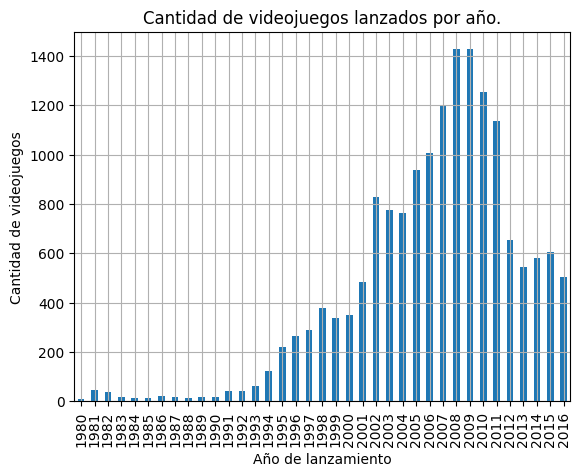

In [24]:

counts_games_per_year.plot(kind='bar',legend=False,
                           ylabel='Cantidad de videojuegos',
                           xlabel='Año de lanzamiento',
                           title='Cantidad de videojuegos lanzados por año.')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, tu gráfica de barras está bien realizada. Colocaste nombres a los ejes y un título para la gráfica, además las líneas ayudan a entender mejor y comparar los años.
</div>

Contestando a la pregunta si son significativos los datos de cada periodo. Sí son significativos ya que a los largo de los años había incremantado hasta que en el año 2019 empezaron en declive la venta de los videojugos. Siendo el mejor año 2008.

#### Observar cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

##### Plataformas con mayores ventas y su distribución.

In [25]:
sales_per_platform = pd.pivot_table(df_games,values='total_sales',
               columns='platform',
               index='year_of_release',
               aggfunc='sum')
sales_per_platform.sample(7)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,130.14,NaN,33.86,27.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,49.08,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.32,NaN,135.26,0.18,NaN
1997,NaN,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def identify_most_company_sales(data):
    columns = data.columns
    list = []
    dict = {}
    for column in columns:
        dict[column] = data[column].sum()
    return dict

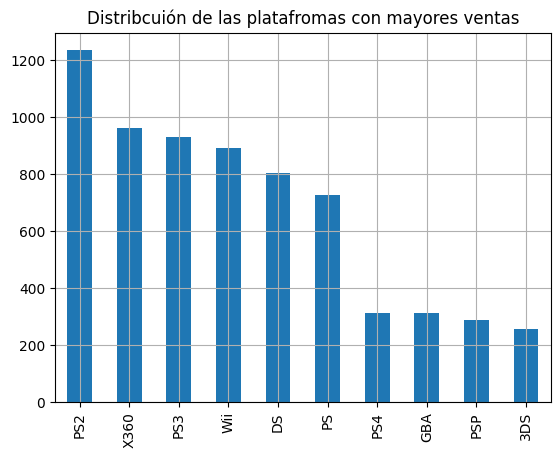

In [27]:
max_sales_per_platfrom = pd.DataFrame.from_dict(identify_most_company_sales(sales_per_platform),orient='index',columns=['total_sales'])
max_sales_per_platfrom = max_sales_per_platfrom.sort_values(by='total_sales',ascending=False).head(10)

max_sales_per_platfrom.plot(kind='bar',
                            title='Distribcuión de las platafromas con mayores ventas',
                            legend=False)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. La gráfica de barras es correcta y está ordenada de mayor a menor lo que facilita la comparación de las distintas plataformas.
</div>

#### Visulizar la plataformas que solian ser populares pero ahora no tienen ventas.

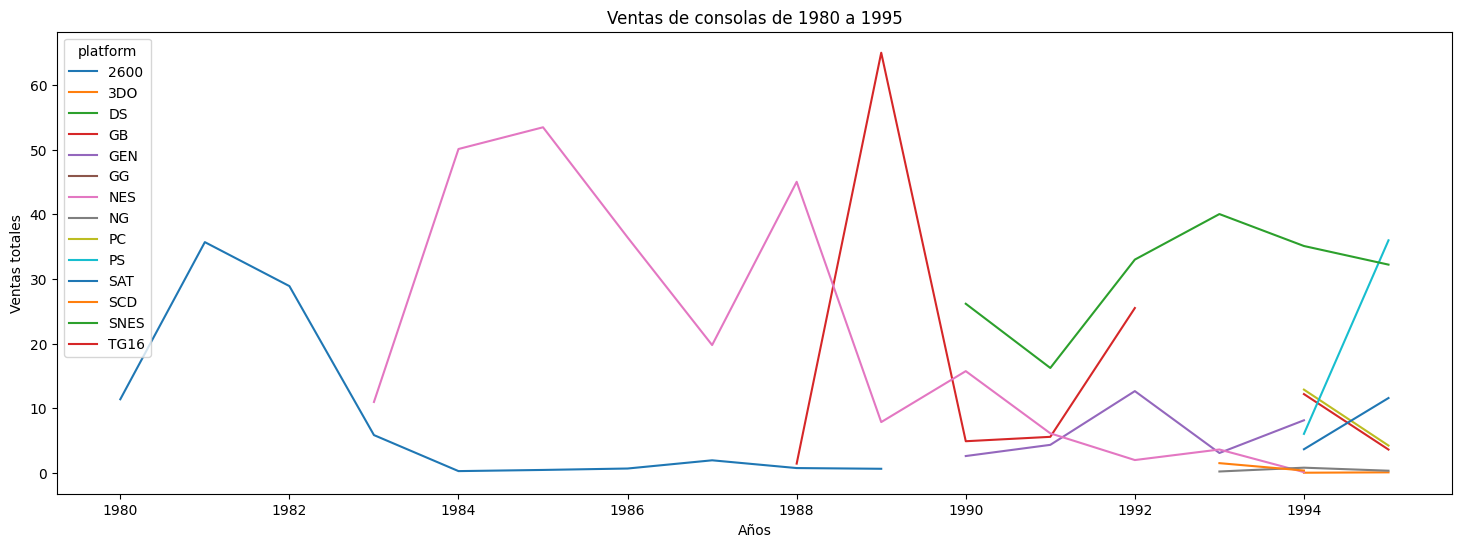

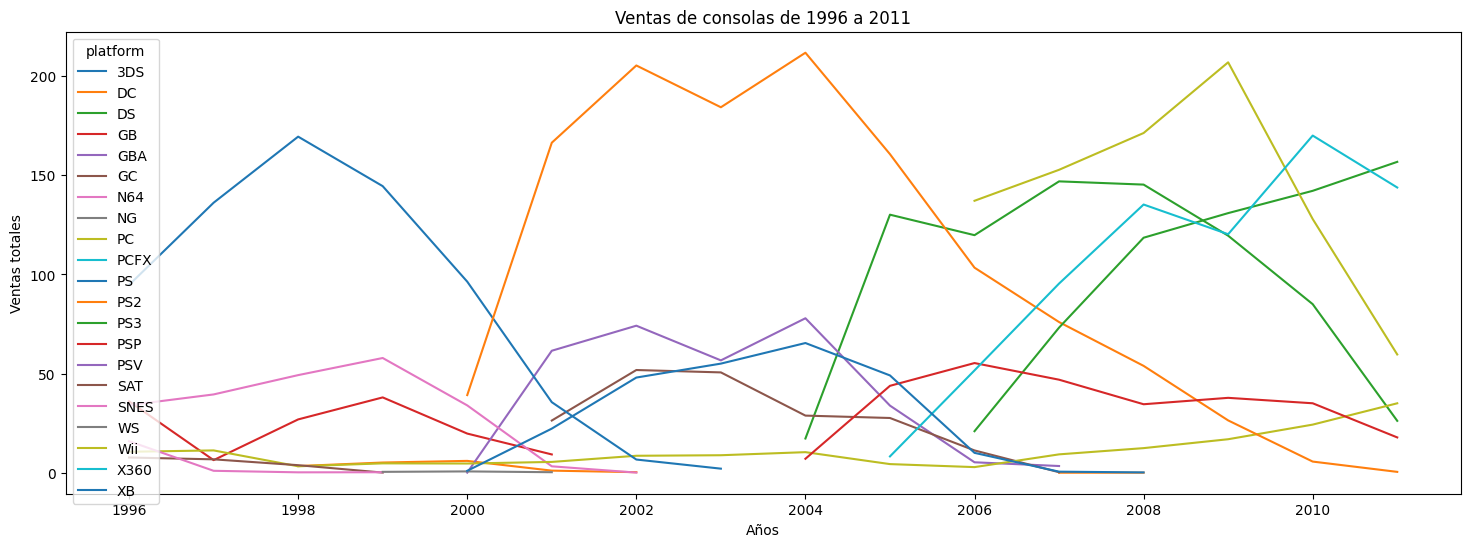

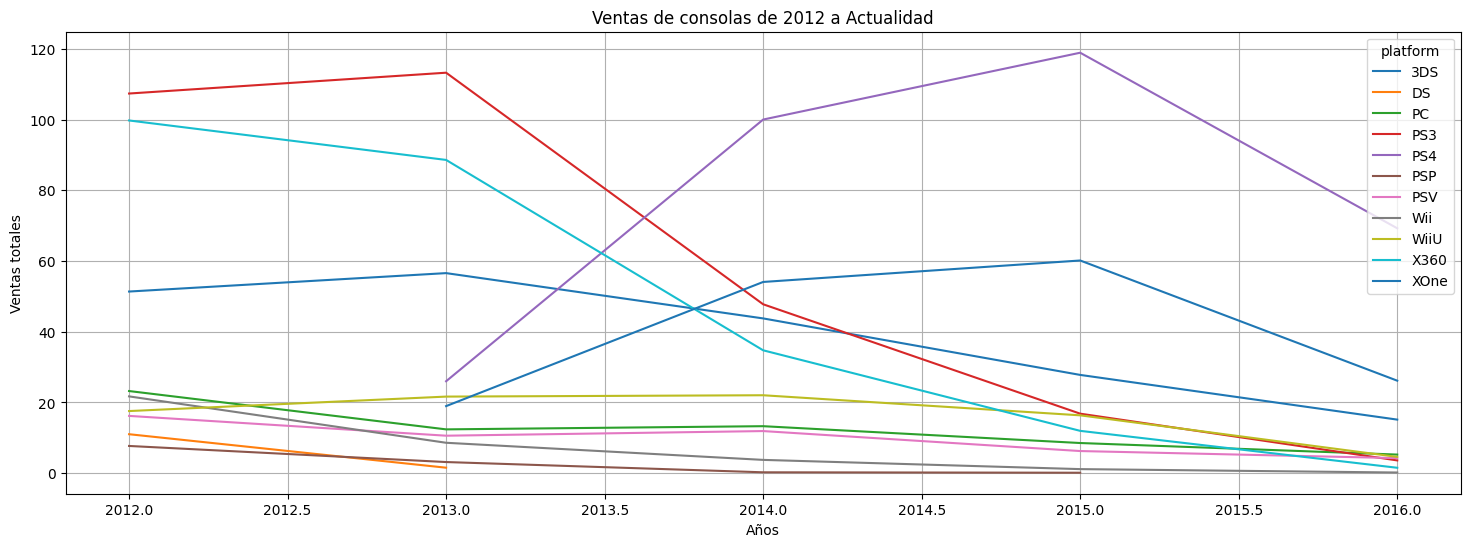

In [28]:
sales_per_platform.loc[:1995]\
.dropna(axis=1, how='all')\
.plot(kind='line',
      xlabel='Años',
      ylabel='Ventas totales',
      title='Ventas de consolas de 1980 a 1995',
      figsize=(18,6))

sales_per_platform.loc[1996:2011].dropna(axis=1, how='all')\
.dropna(axis=1, how='all')\
.plot(kind='line',
      xlabel='Años',
      ylabel='Ventas totales',
      title='Ventas de consolas de 1996 a 2011',
      figsize=(18,6))

sales_per_platform.loc[2012:].dropna(axis=1, how='all')\
.dropna(axis=1, how='all')\
.plot(kind='line',
      xlabel='Años',
      ylabel='Ventas totales',
      title='Ventas de consolas de 2012 a Actualidad',
      figsize=(18,6))


plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, comparaste correctamente las plataformas en distintos periodos de tiempo, como única recomendación a veces es mejor dejar de lado algo de información para que las gráficas se comprendan mejor, en este caso por cada periodo se podría tomar solo el top 5 para no tener tantas consolas y muchas líneas y enfocarnos solo en las que tienen más ventas.
</div>

In [29]:
#Función para calcular cuanto tarda una plataforma en desaparecer.

def year_of_dissaperance(data):
    data_group_by_year = data.groupby('year_of_release').count()
    data_columns = data_group_by_year.columns
    total_years = 0
    for column in data_columns:
        count_years = data_group_by_year[data_group_by_year[column] == 1][column].sum()
        total_years += count_years
    return total_years/len(data_columns)

In [30]:
f'Una plataforma en promedio deja de vender completamente a los {year_of_dissaperance(sales_per_platform):.2f} años.'

'Una plataforma en promedio deja de vender completamente a los 7.68 años.'

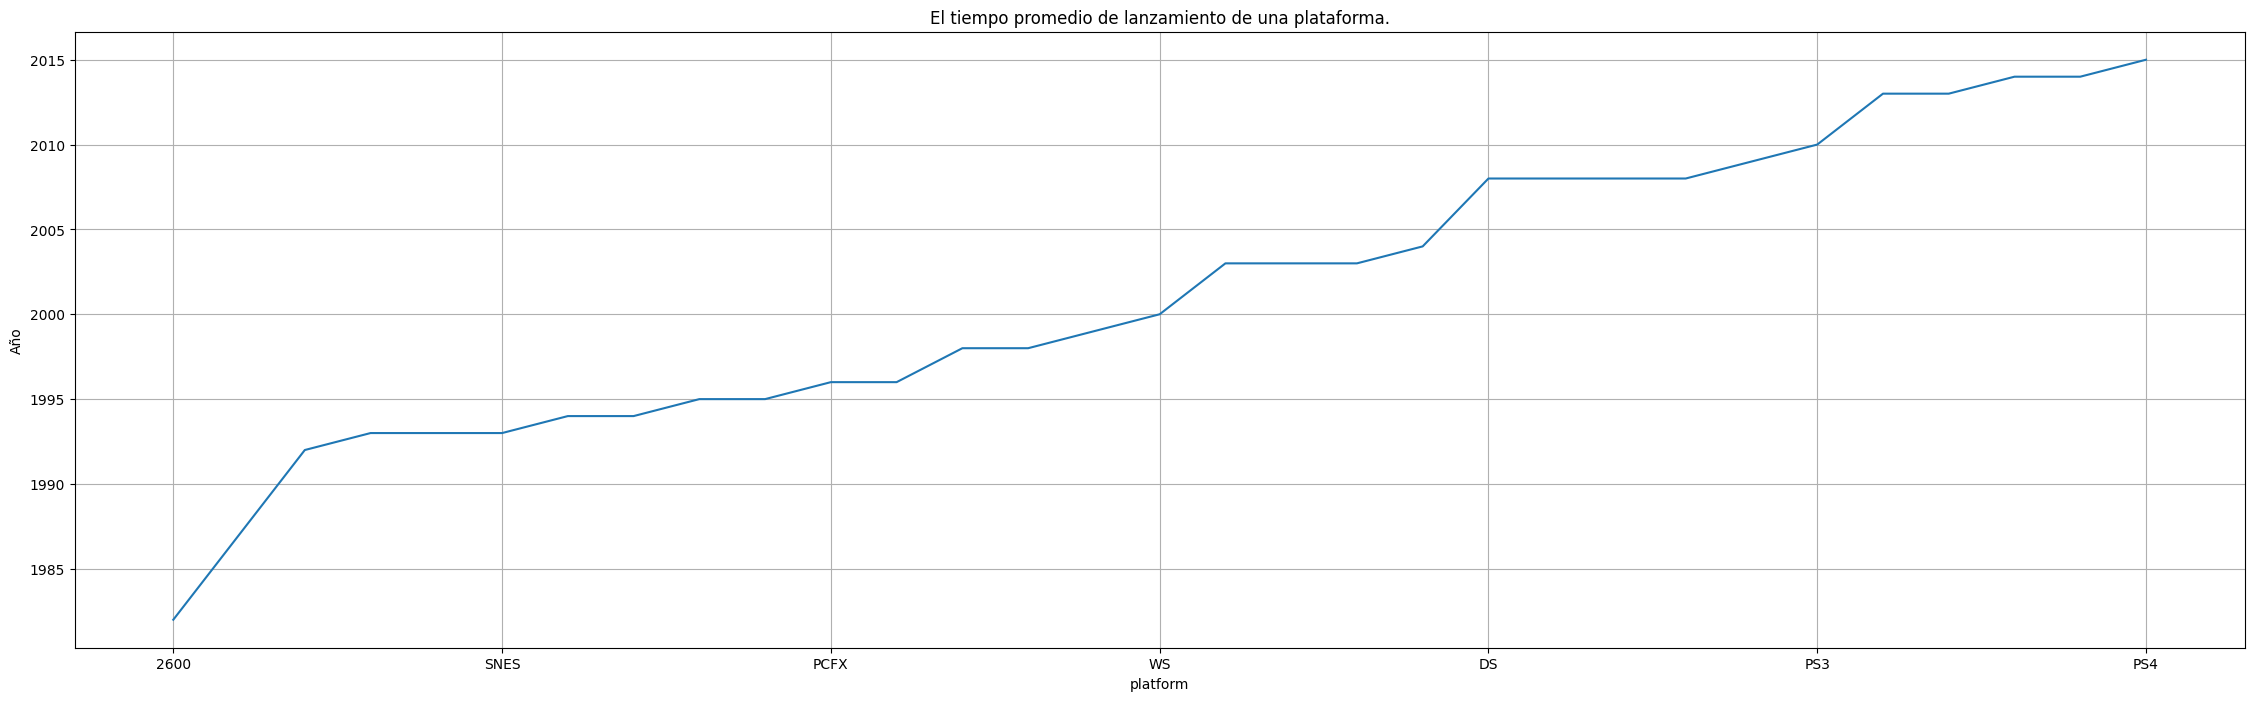

In [31]:
grouped_by_platform = df_games.groupby('platform')

grouped_by_platform['year_of_release'].mean().sort_values().astype('int64').plot(kind='line',
                                                                                 figsize=(28,8),
                                                                                 ylabel='Año',
                                                                                 title='El tiempo promedio de lanzamiento de una plataforma.')
plt.grid(True)
plt.show()

Se dividió la ventas de plataformas en 3 gráficas para que sea más fácilmente su visualización. Las plataformas que eran populares en su época fueron `NES`, `GB`, `SNES`, `PSone`, `PS2`, `WII` & `DS`. Siendo `PS2` la consola más vendida.
De acuerdo a las  4 gráficas, nos indica que una plataforma tarda en promedio en ser lanzada unos 3.1 años apróximadamente. Además una platafroma deja de venderse casi 8 años desde su lanzamiento.

#### Determina para qué período debes tomar datos. Para hacerlo es necesario respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Para la campaña del 2017 podríamos trabajar con las consolas de últimas generación. Esas son `PS4`, `WIIU`, `XOne` & `PC`. Un gran dato es que la plataforma `PC` ha estado presente desde 1994, aunque en una liena plana.


Corregir la gráfica tomando únicamente en cuenta los últimos años.

In [32]:
current_most_popular_platforms = ['PS4','WiiU','XOne','PC']

##### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [33]:
sales_per_platform = sales_per_platform[current_most_popular_platforms].dropna(axis=0, how='all') #Remover las filas que no tengas datos de las plataformas.
sales_per_platform.sample(10)

platform,PS4,WiiU,XOne,PC
year_of_release,,,,
1992,NaN,NaN,NaN,3.03
2005,NaN,NaN,NaN,4.37
1985,NaN,NaN,NaN,0.04
2004,NaN,NaN,NaN,10.39
2001,NaN,NaN,NaN,5.47
2013,25.99,21.65,18.96,12.38
1996,NaN,NaN,NaN,10.58
2002,NaN,NaN,NaN,8.57
2012,NaN,17.56,NaN,23.22


##### Visualización de plataformas líderes en ventas en los útimos años.

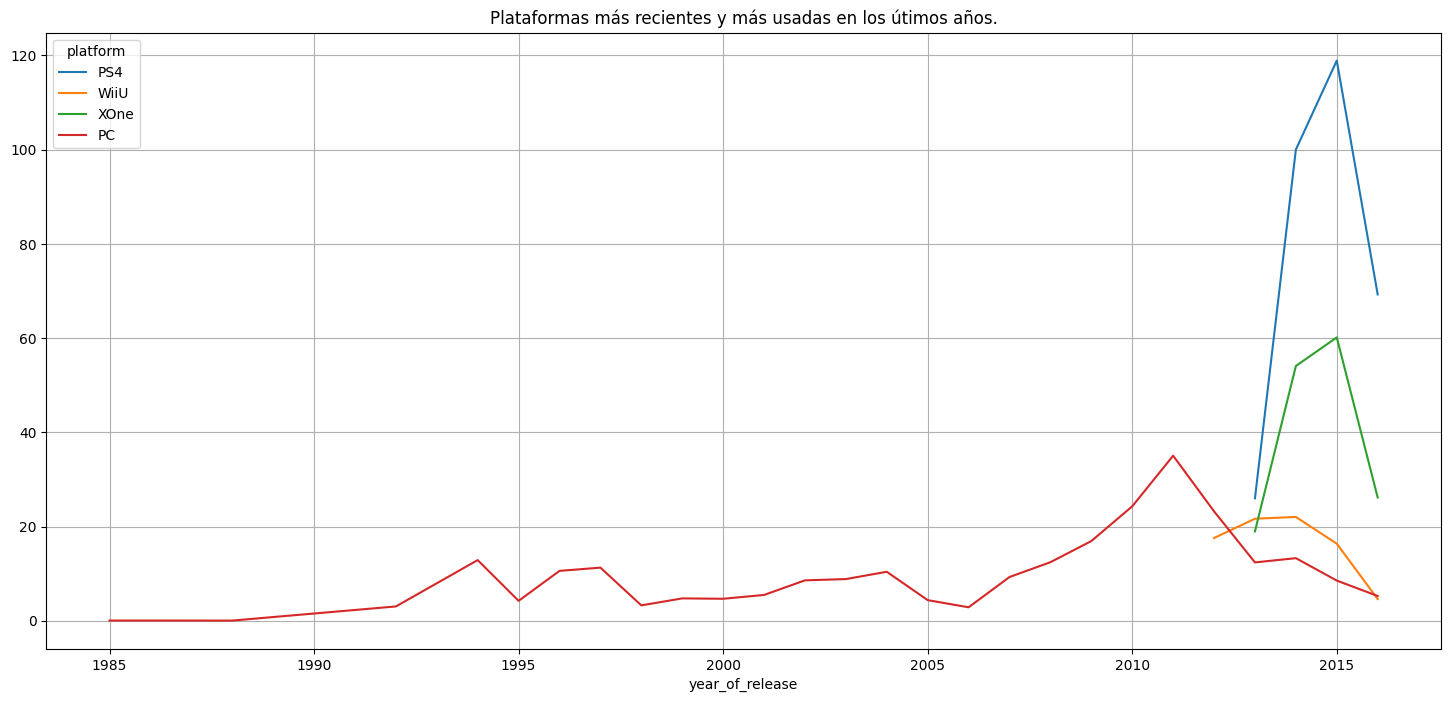

In [34]:
sales_per_platform.plot(kind='line',figsize=(18,8),title='Plataformas más recientes y más usadas en los útimos años.')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, aunque en este caso si se iba a considerar las plataformas líderes en periodos recientes sería mejor solo graficar los últimos años, ya que es el intervalo de interes, además de que solo 1 de las plataformas tiene información antes de 2012.
</div>

Las plataformas líderes en ventas son `PS4` y `XOne`, teniendo un incremento de ventas desde su lanzamiento hasta el 2015 que empezarona disminuir sus ventas. Las ventas de la plataforma `PC` ascendieron en el año 2006 hasta el año 2011. A la `WiiU` no le fue tan bien en ventas en comparación a las demás consolas, empezaron a dismnuir en el año 2014. Por lo tanto las consolas mayormente rentables para la campaña del próximo año son `XOne` y `PS4`

#### Visualización de las ventas globales de todos los juegos por plataforma.

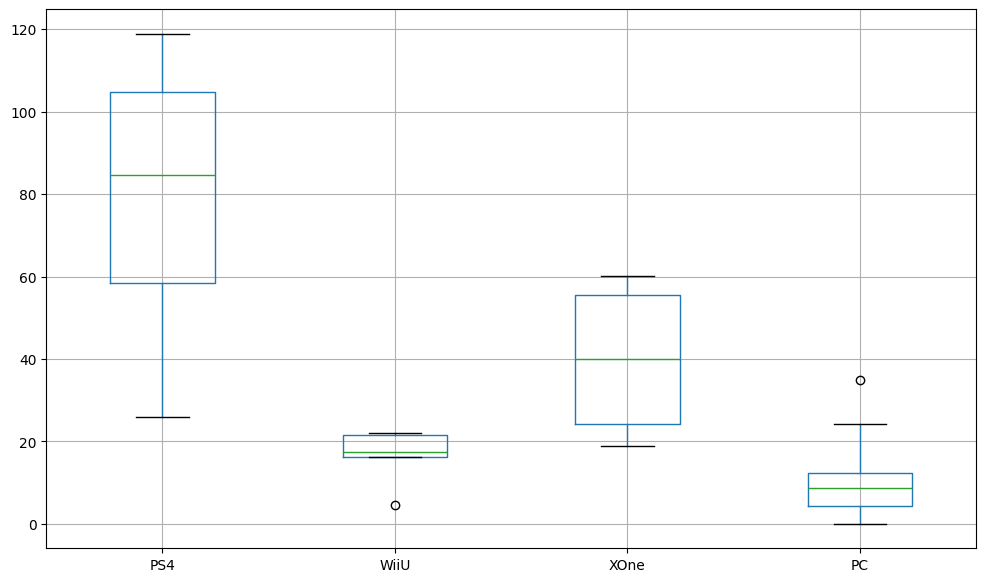

In [35]:
sales_per_platform.boxplot(figsize=(12,7))
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. Los boxplots se comparan en el mismo eje, esto ayuda a compararlos mejor.
</div>

In [36]:
sales_per_platform.describe()

platform,PS4,WiiU,XOne,PC
count,4.000000,5.000000,4.000000,26.000000
mean,78.535000,16.438000,39.830000,9.836923
std,40.567917,7.068244,20.313977,7.997666
min,25.990000,4.600000,18.960000,0.030000
25%,58.435000,16.350000,24.352500,4.442500
50%,84.625000,17.560000,40.110000,8.705000
75%,104.725000,21.650000,55.587500,12.410000
max,118.900000,22.030000,60.140000,35.030000


Como observamos en el diagrama de cajas, obervamos que son significativas las ventas por plataforma. En la plataforma `XOne` y `PS4`no se encontraron valores atípicos, aunque, en la plataforma `PS4` la mediana es mayor a la media. Por otro lado, En `WIIU`, observamos que hay un valor atípico debajo del primer cuartil y en la plataforma `PC` arriba del tercer cuartil. 

#### Visualización de reseñas de usuarios y profesionales afectan las ventas de las plataformas. Crear una gráfica de dispersión y calcular la correlación entre la reseñas y las ventas.

In [37]:
mask = "platform == 'PS4'"
df_games.query(mask)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,7.1,7.5,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.1,7.5,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16232,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,6.9,7.5,NaN,0.01
16235,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,7.1,7.5,NaN,0.01
16257,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,6.1,7.9,T,0.01
16261,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,5.1,5.5,M,0.01


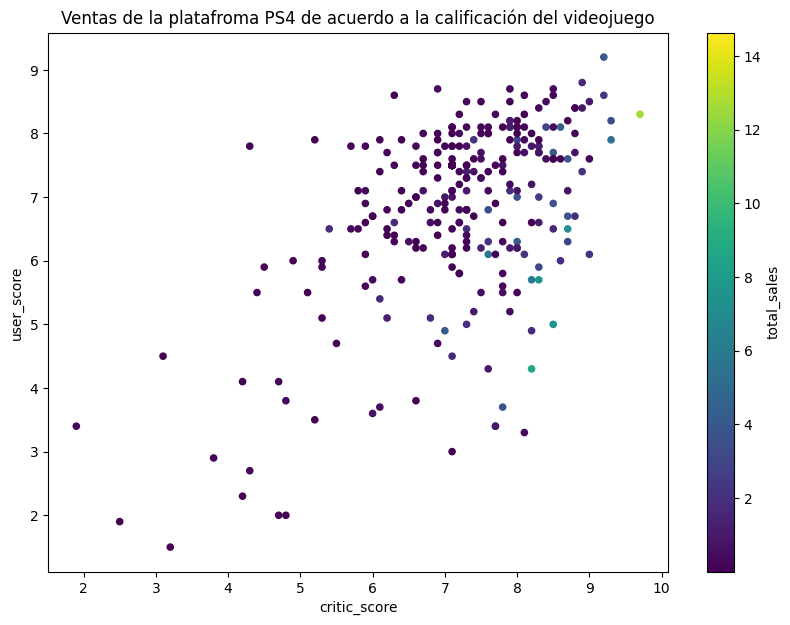

In [38]:
mask = "platform == 'PS4'"
df_games.query(mask).plot(kind='scatter',
                      x='critic_score',
                      y='user_score',
                      c='total_sales',
                      colormap='viridis',
                      title="Ventas de la platafroma PS4 de acuerdo a la calificación del videojuego",
                      figsize=(10,7),legend=True)
plt.show()

De acuerdo a la gráfica de dispersión pordemos observar que las calificación de los profesinales y de los juegadroes tienen una correlación positiva aproximadamente de 0.4. Por lo tanto las ventas totales suelen crecer entre mejor califiquen al videojuego.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios basados en la relación observada en la gráfica.
</div>

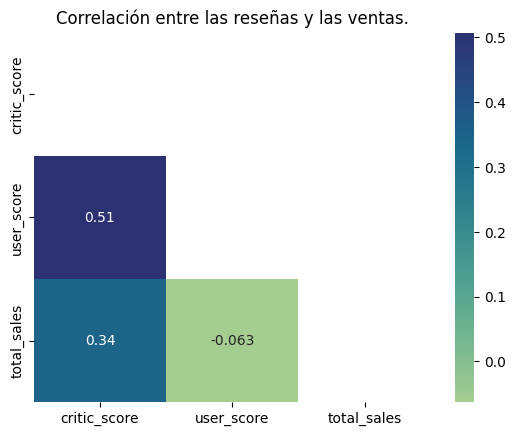

In [39]:
scores_total_sales = ['critic_score','user_score','total_sales']
data=df_games.query(mask)[scores_total_sales]
heatmap_mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data.corr(), annot=True, cmap="crest",mask= heatmap_mask)
plt.title('Correlación entre las reseñas y las ventas.')
plt.show()

Como mencionamos anteriormente `critic_score` y `user_score` tienen una correlación positiva pero aquí tenemos una clara correlación positiva de 0.51. En cuanto a `critic_score` y `total_sales` tienen, igualmente, una correlación positiva, pero de 0.34.

Al igual que la correlación de `critics_score` y `score_score`. `critics_score` tiende a subir cuando `total_sales` sube.

Por otro lado, `user_score` y `total_sales` tienen una correlación negativa de 0.063. Esto quiere decir entre `user_score` sube, `total sales` disminuyen y viceversa.

Por lo tanto los compradores se basan en la claficación de la critica que de los mismos jugadores y la ventas totales suelen ser mayores cuando los jugadores califican al juego como malo. Interesante dato.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la correlación de las variables da bastante información.
</div>

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. 

##### Comparando las ventas pero en la plataforma `XOne`.

In [40]:
mask_xbox = "platform == 'XOne'"
df_games.query(mask_xbox)[scores_total_sales]

,critic_score,user_score,total_sales
99,7.1,7.5,7.39
165,9.7,7.9,5.47
179,8.1,5.4,5.26
241,8.4,6.4,4.49
269,8.8,6.2,4.22
...,...,...,...
16361,6.3,8.2,0.01
16374,7.1,6.6,0.01
16376,7.1,7.5,0.01
16391,7.4,6.7,0.01


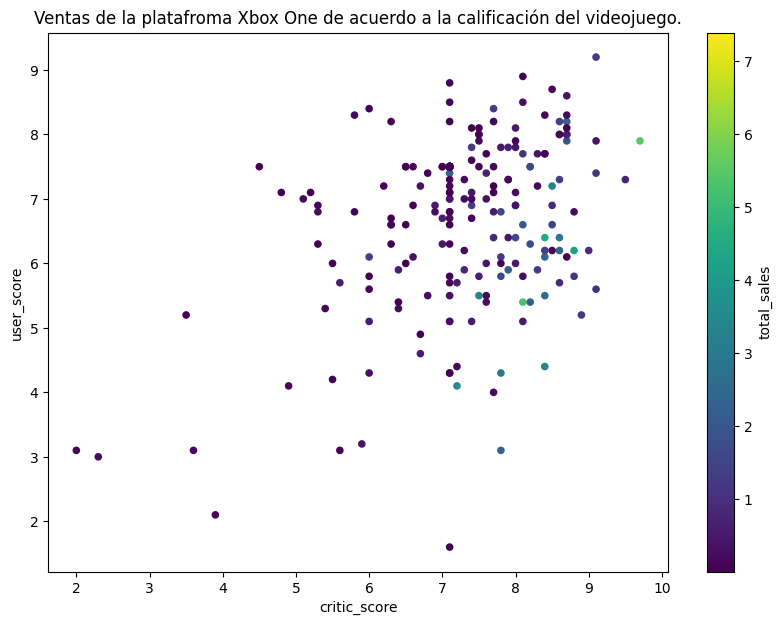

In [41]:
df_games.query(mask_xbox).plot(kind='scatter',
                      x='critic_score',
                      y='user_score',
                      c='total_sales',
                      colormap='viridis',
                      title="Ventas de la platafroma Xbox One de acuerdo a la calificación del videojuego.",
                      figsize=(10,7),legend=True)
plt.show()

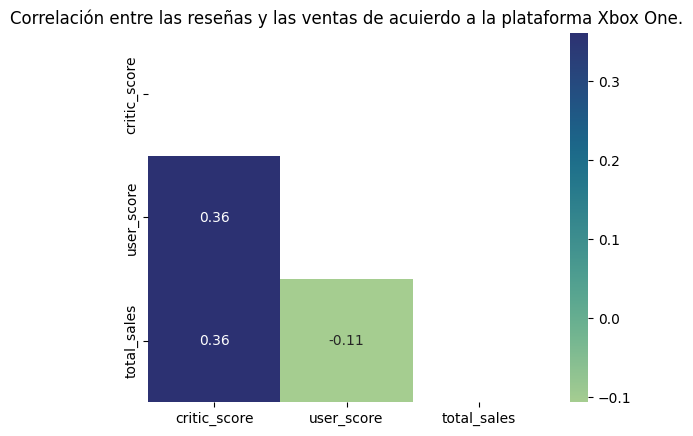

In [42]:
data=df_games.query(mask_xbox)[scores_total_sales]
heatmap_mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data.corr(), annot=True, cmap="crest",mask= heatmap_mask)
plt.title('Correlación entre las reseñas y las ventas de acuierdo a la plataforma Xbox One.')
plt.show()

Las correlaciones de la plataforma Xbox One con las de PS4 son similares. La correlación de `critic_score` con `total_sales` es posotivia y es de 0.36. La de `critic_score` y `user_ccore` igualmente positiva y es de 0.36.

Con respecto la de `user_score` y `total_sales`. Algunos jugadores prefieren comprar el juego y sacar sus propias conslusiones sobre del juego.

##### Comparando las ventas pero en la plataforma `WiiU`

In [43]:
def corr_platform(data,platform,columns=[]):
    mask = "@platform == platform"
    data = data.query(mask)[columns]
    heatmap_mask = np.triu(np.ones_like(data.corr()))
    sns.heatmap(data.corr(), annot=True,cmap="crest",mask=heatmap_mask)
    plt.title(f'Correlación entre las reseñas y las ventas de acuerdo a la plataforma {platform}')
    plt.show()

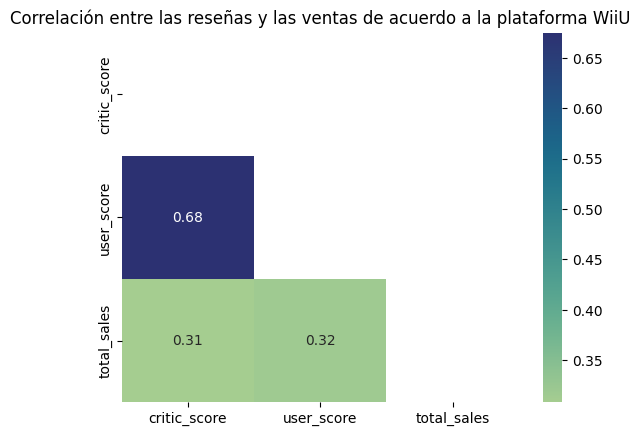

In [44]:
corr_platform(df_games,'WiiU',['critic_score','user_score','total_sales'])

Parece que a los jugadores de `WiiU` les gusta que tanto la calificación de la crítica y de los jugadores para comprar sus juegos.

##### Comparando las ventas pero en la plataforma `PC`.

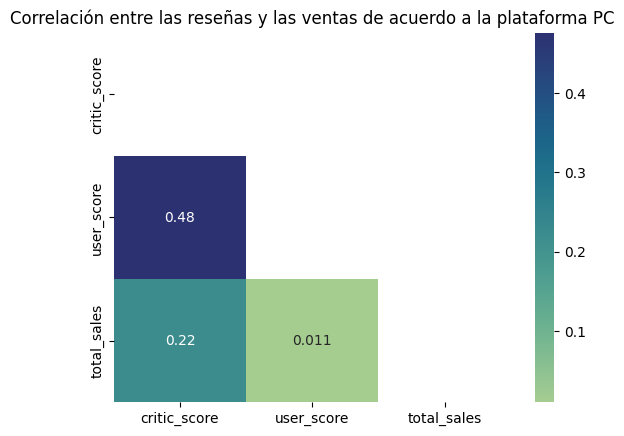

In [45]:
corr_platform(df_games,'PC',['critic_score','user_score','total_sales'])

Las 3 correlaciones en al plataforma `PC` son positivas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis para esta plataforma.
</div>

### Visualización de la distibución general de los juegos por género.


La gráfica está bien; solo sería ordnarla de mayor a menor.

In [46]:
popular_platforms = ['PS4','PC','WiiU','XOne']
mask_popular_platforms = "platform == @popular_platforms"

df_most_popular_platforms = df_games.query(mask_popular_platforms).reset_index(drop=True).copy()

df_most_popular_platforms.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
606,Disney's Planes,WiiU,2013,Simulation,0.14,0.04,0.00,0.02,5.1,5.3,E,0.20
1450,Paragon,PS4,2016,Action,0.02,0.00,0.00,0.00,7.1,6.1,NaN,0.02
1437,The Lord of the Rings: The Battle for Middle-E...,PC,2006,Strategy,0.01,0.01,0.00,0.00,8.4,7.5,T,0.02
222,Evolve,PS4,2015,Shooter,0.36,0.41,0.05,0.15,7.6,4.3,M,0.97
1208,Tour de France 2014,PS4,2014,Sports,0.00,0.03,0.00,0.00,5.3,5.1,E,0.03
225,Rise of the Tomb Raider,PS4,2016,Adventure,0.23,0.53,0.04,0.14,7.1,7.5,NaN,0.94
108,Destiny: The Taken King,PS4,2015,Shooter,0.78,0.79,0.04,0.31,8.6,6.0,T,1.92
1304,World of Zoo,PC,2009,Simulation,0.00,0.02,0.00,0.01,7.1,8.4,E,0.03
1707,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,7.1,6.8,T,0.01
1228,The Void,PC,2008,Adventure,0.00,0.03,0.00,0.01,7.7,8.3,NaN,0.04


In [47]:
df_most_popular_platforms_by_genres = pd.pivot_table(df_most_popular_platforms,
               values='name',
               index='genre',
               aggfunc='count')

df_most_popular_platforms_by_genres

,name
genre,
Action,459
Adventure,110
Fighting,35
Misc,83
Platform,45
Puzzle,30
Racing,100
Role-Playing,175
Shooter,236


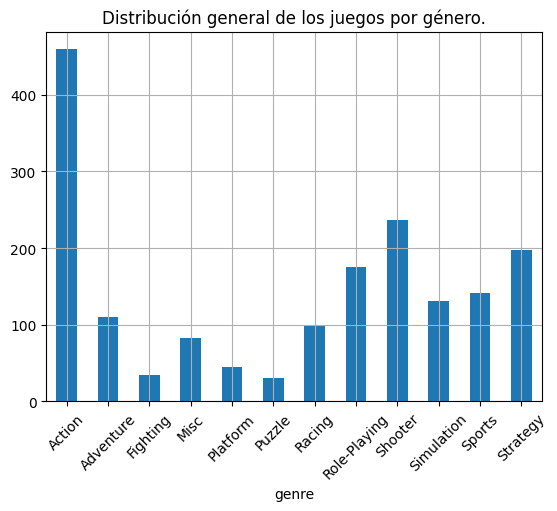

In [48]:
df_most_popular_platforms_by_genres.plot(kind='bar',
                                         rot=45,
                                         legend=False,
                                         title='Distribución general de los juegos por género.')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La gráfica es buena, como único consejo recomendaria ordenarla de mayor a menor o de menor a mayor para que sea más fácil de comparar, eso es la visualización resulta mejor que ordenar alfabéticamente.
</div>

          total_sales
platform             
PC             255.76
PS4            314.14
WiiU            82.19
XOne           159.32
          total_sales  most_popular_genres_sales  other_genres_sales
platform                                                            
PC             255.76                     167.56               88.20
PS4            314.14                     214.27               99.87
WiiU            82.19                      29.21               52.98
XOne           159.32                     108.61               50.71


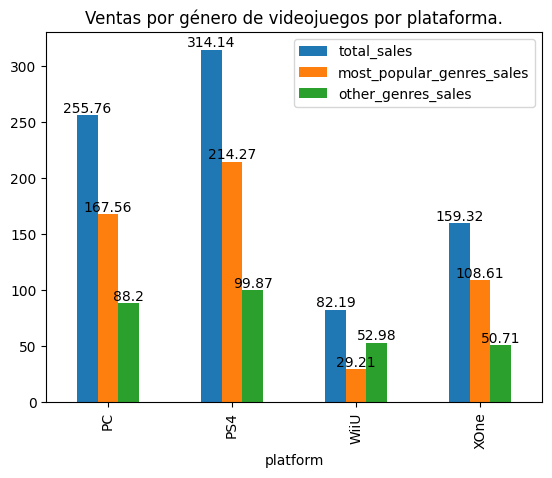

In [49]:
total_sales_by_platforms = pd.pivot_table(df_most_popular_platforms,values='total_sales',
                                                                    index='platform',
                                                                    aggfunc='sum')


print(total_sales_by_platforms)

most_popular_genres = ['Action','Shooter','Strategy','Role-Playing']

mask_most_popular_genres = "genre in @ most_popular_genres"
mask_rest_genres = "genre not in @most_popular_genres"

total_sales_by_platforms['most_popular_genres_sales'] = df_most_popular_platforms\
    .query(mask_most_popular_genres).groupby('platform')['total_sales'].sum()
total_sales_by_platforms['other_genres_sales'] = df_most_popular_platforms\
    .query(mask_rest_genres).groupby('platform')['total_sales'].sum()

print(total_sales_by_platforms)

total_sales_by_platforms['total_sales'].max()
ax = total_sales_by_platforms.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ventas por género de videojuegos por plataforma.')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena gráfica, me gusto como colocaste los valores junto a cada barra, eso le da un gran valor visual.
</div>

In [50]:
top_bottom_five_genres = ['Action','Shooter','Strategy', 'Role-Playing', 'Fighting', 'Puzzle', 'Platform','Misc', 'Racing']

mask = 'genre in @top_bottom_five_genres'

df_most_popular_platforms.query(mask).sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,7.1,7.5,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.1,7.5,NaN,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66
7,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.1,7.5,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
1604,Legoland,PC,1999,Action,0.00,0.01,0.00,0.00,7.1,7.5,NaN,0.01
1605,Valentino Rossi: The Game,PC,2016,Racing,0.00,0.01,0.00,0.00,7.2,6.2,E,0.01
1606,Sengoku,PC,2011,Strategy,0.00,0.01,0.00,0.00,7.0,6.8,T,0.01
1612,Guild Wars: Factions,PC,2006,Role-Playing,0.00,0.01,0.00,0.00,8.4,8.5,T,0.01


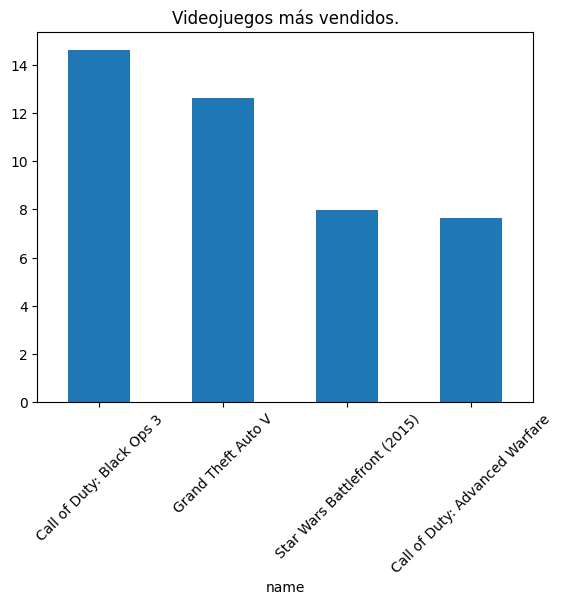

In [51]:
df_most_popular_platforms = df_most_popular_platforms.query(mask).sort_values(by='total_sales',ascending=False)

df_most_popular_platforms.loc[:5].plot(kind='bar',
                                       x='name',
                                       y='total_sales',
                                       rot=45,
                                       legend=False,
                                       title='Videojuegos más vendidos.')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. Ordenaste las barras y los nombres están inclinados para que no se crucen.
</div>

En la gráfica `Distribución general de los juegos por género` podemos observar que el género de los videojuegos más vendidos son `Action`, `Shooter`, `Strategy` & `Role-Playing` y los géneros menos vendidos son `Fighting`, `Puzzle`, `Platform`, `Misc`, `Racing`. 

En la siguiente gráfica,`Ventas por género de videojuegos por plataforma`, agrupando estos género en el grupo `most_popular_genres_sales`, observamos que tienen la mayoría de las ventas en la plataformas `PC`, `PS4` &`XOne`. Mientras que en `WiiU` lideran los otros géneros.

Información general de los géneros con ventas altas.

- Los 5 juegos más vendidos son de género `Shooter` y `Action`. 
- Los primeros cautro juegos son de la plataforma `PS4` y el quinto `XOne`.
- El juego con mayor ventas es `Call of Duty: Black Ops 3`, es un `Shooter` y fue lanzado en el año `2015`.
- El segundo juego con mayor ventas es `Grand Theft Auto V`, es un `Action` y fue lanzado en el `2014`.

Información general de los géneros con  altas.

- Los 5 juegos menos vendidos son de género `Role-playing`, `Stretegy`, `Racing` & `Action`.
- Todos lo juegos son de `PC`.
- Solo tuvieron ventas en `Japón`.


## Paso 4. Crear un perfil de usuario para cada región 

### 

### Para cada región (NA, UE, JP) determina:

•	Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
•	Los cinco géneros principales. Explica la diferencia.
•	Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [52]:
#Las 5 plataformas principales de Estados Unidos

top_five_platforms_na = pd.pivot_table(df_games[['na_sales','platform']],values='na_sales',index='platform').sort_values(by='na_sales',ascending=False)
top_five_platforms_na = top_five_platforms_na.reset_index().head()

top_five_platforms_na

,platform,na_sales
0,NES,1.285102
1,GB,1.171546
2,GEN,0.725862
3,2600,0.696379
4,X360,0.483555


In [53]:
# Las 5 principaples plataformas en Europa

top_five_platforms_eu = pd.pivot_table(df_games[['eu_sales','platform']],values='eu_sales',index='platform').sort_values(by='eu_sales',ascending=False)

top_five_platforms_eu = top_five_platforms_eu.reset_index().head()

In [54]:
top_five_platforms_jp = pd.pivot_table(df_games[['jp_sales','platform']],values='jp_sales',index='platform').sort_values(by='jp_sales',ascending=False)

top_five_platforms_jp = top_five_platforms_jp.reset_index().head()

In [55]:
top_five_platforms_other = pd.pivot_table(df_games[['other_sales','platform']],values='other_sales',index='platform')\
    .sort_values(by='other_sales',ascending=False)
    
top_five_platforms_other = top_five_platforms_other.reset_index().head()

top_five_platforms_other
 

,platform,other_sales
0,PS4,0.123342
1,PS3,0.103055
2,PS2,0.089549
3,GB,0.084124
4,X360,0.068896


In [56]:
first_merge_platforms = top_five_platforms_na.merge(top_five_platforms_eu,on='platform',how='outer')

first_merge_platforms

,platform,na_sales,eu_sales
0,2600,0.696379,NaN
1,GB,1.171546,0.489794
2,GEN,0.725862,NaN
3,NES,1.285102,0.215816
4,PS3,NaN,0.250544
5,PS4,NaN,0.359923
6,X360,0.483555,0.217792


In [57]:
second_merge_platforms = first_merge_platforms.merge(top_five_platforms_jp,on='platform', how='outer')

last_merge_platform = second_merge_platforms.merge(top_five_platforms_other,on='platform', how='outer')

In [58]:
last_merge_platform = last_merge_platform.query("other_sales != 0").reset_index(drop=True)

In [59]:
last_merge_platform.fillna(0,inplace=True)

In [60]:
last_merge_platform['total_sales'] = total_sales(last_merge_platform)

last_merge_platform.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2600,0.696379,0.000000,0.000000,0.000000,0.696379
1,3DS,0.000000,0.000000,0.196523,0.000000,0.196523
2,GB,1.171546,0.489794,0.877526,0.084124,2.622990
3,GEN,0.725862,0.000000,0.000000,0.000000,0.725862
4,NES,1.285102,0.215816,1.006633,0.000000,2.507551


In [61]:
top_5_platforms_region = last_merge_platform.copy()

top_5_platforms_region.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2600,0.696379,0.000000,0.000000,0.000000,0.696379
1,3DS,0.000000,0.000000,0.196523,0.000000,0.196523
2,GB,1.171546,0.489794,0.877526,0.084124,2.622990
3,GEN,0.725862,0.000000,0.000000,0.000000,0.725862
4,NES,1.285102,0.215816,1.006633,0.000000,2.507551


In [62]:
def var_per_region(data):
    
    data['total_sales_variation'] = (data['total_sales'] * 100) / data['total_sales']
    data['na_sales_variation'] = (data['na_sales'] * 100) / data['total_sales']
    data['eu_sales_variation'] = (data['eu_sales'] * 100) / data['total_sales']
    data['jp_sales_variation'] = (data['jp_sales'] * 100) / data['total_sales']
    data['other_sales_variation'] = (data['other_sales'] * 100) / data['total_sales'] 
    
    return data
    

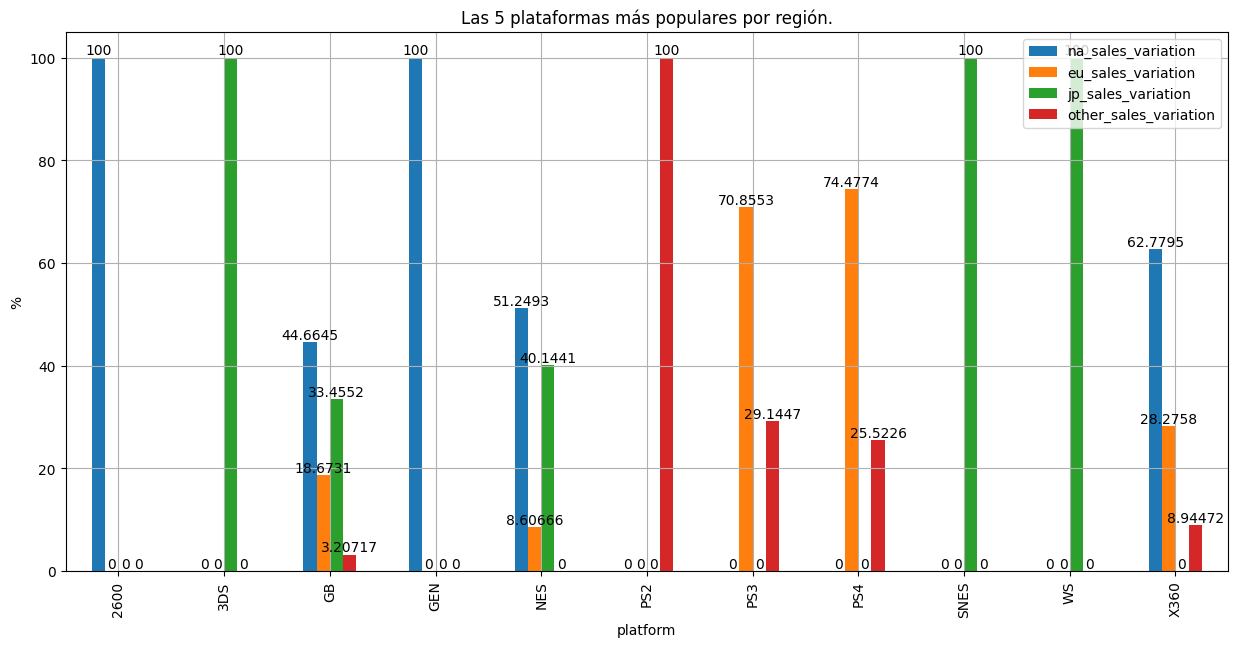

In [63]:
top_5_platforms_region = top_5_platforms_region.apply(var_per_region,axis=1)

ax = top_5_platforms_region\
    [['platform','na_sales_variation','eu_sales_variation','jp_sales_variation','other_sales_variation']]\
    .plot(kind='bar',
          x='platform',
          ylabel='%',
          title='Las 5 plataformas más populares por región.',figsize=(15,7))
ax.legend(loc='upper right')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis por región.
</div>

En al gráfica podemos observar que las varianza del marcado de una región a otra solo destacan la plataformas `GB`, `NES` y `X360`.

También podemos apreciar que la consola de última generación `PS4` lidera en el mercado de Europa y otras regiones.

### Los géneros principales.

In [64]:
top_five_genre_na = pd.pivot_table(df_games[['na_sales','genre']],values='na_sales',index='genre')\
    .sort_values(by='na_sales',ascending=False)
top_five_genre_na = top_five_genre_na.reset_index().head()

top_five_genre_eu = pd.pivot_table(df_games[['eu_sales','genre']],values='eu_sales',index='genre')\
    .sort_values(by='eu_sales',ascending=False)
top_five_genre_eu = top_five_genre_eu.reset_index().head()

top_five_genre_jp = pd.pivot_table(df_games[['jp_sales','genre']],values='jp_sales',index='genre')\
    .sort_values(by='jp_sales',ascending=False)
top_five_genre_jp = top_five_genre_jp.reset_index().head()

top_five_genre_other = pd.pivot_table(df_games[['other_sales','genre']],values='other_sales',index='genre')\
    .sort_values(by='other_sales',ascending=False)
top_five_genre_other = top_five_genre_other.reset_index().head()

In [65]:
print(top_five_genre_na,'\n')
print(top_five_genre_eu,'\n')
print(top_five_genre_jp,'\n')
print(top_five_genre_other)

      genre  na_sales
0  Platform  0.506196
1   Shooter  0.451258
2    Racing  0.291077
3    Sports  0.291067
4  Fighting  0.263453 

      genre  eu_sales
0   Shooter  0.242685
1  Platform  0.227096
2    Racing  0.191264
3    Sports  0.161028
4    Action  0.154518 

          genre  jp_sales
0  Role-Playing  0.238616
1      Platform  0.148872
2      Fighting  0.104277
3        Puzzle  0.099613
4    Simulation  0.074259 

      genre  other_sales
0   Shooter     0.079730
1    Racing     0.061591
2  Platform     0.058098
3    Sports     0.057333
4    Action     0.055101


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, estas listas nos ayudan a comprender mejor los gustos de cada región.
</div>

In [66]:
first_merge_genre = top_five_genre_na.merge(top_five_genre_eu,on='genre',how='outer')
second_merge_genre = first_merge_genre.merge(top_five_genre_jp,on='genre',how='outer')
last_merge_genre = second_merge_genre.merge(top_five_genre_other,on='genre',how='outer')

In [67]:
last_merge_genre = last_merge_genre.fillna(0)
last_merge_genre['total_sales'] = last_merge_genre['na_sales'] + last_merge_genre['eu_sales'] + last_merge_genre['jp_sales']

last_merge_genre

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Action,0.000000,0.154518,0.000000,0.055101,0.154518
1,Fighting,0.263453,0.000000,0.104277,0.000000,0.367730
2,Platform,0.506196,0.227096,0.148872,0.058098,0.882164
3,Puzzle,0.000000,0.000000,0.099613,0.000000,0.099613
4,Racing,0.291077,0.191264,0.000000,0.061591,0.482341
5,Role-Playing,0.000000,0.000000,0.238616,0.000000,0.238616
6,Shooter,0.451258,0.242685,0.000000,0.079730,0.693943
7,Simulation,0.000000,0.000000,0.074259,0.000000,0.074259
8,Sports,0.291067,0.161028,0.000000,0.057333,0.452095


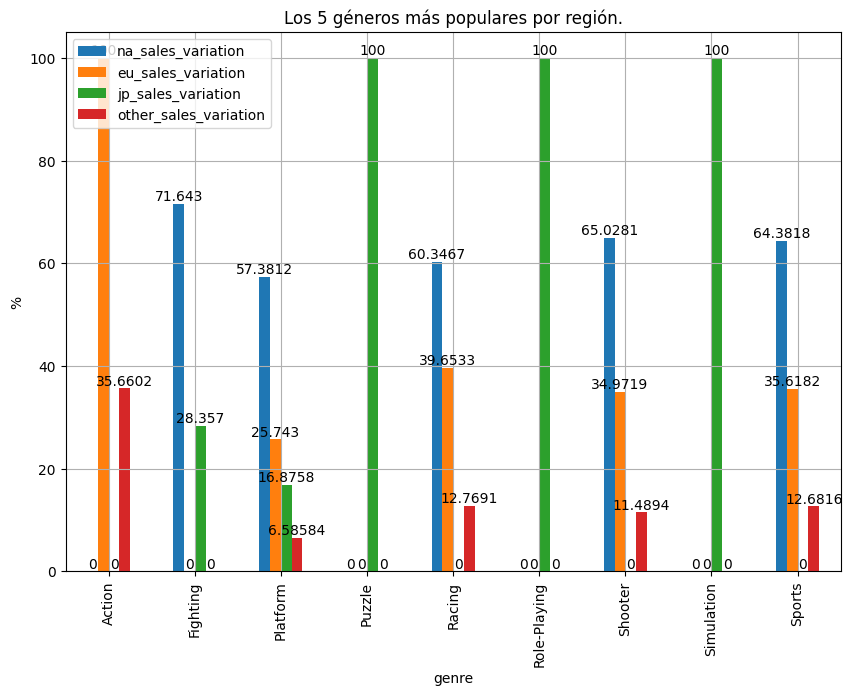

In [68]:
top_5_genre_region = var_per_region(last_merge_genre)


ax = top_5_genre_region\
    [['genre','na_sales_variation','eu_sales_variation','jp_sales_variation','other_sales_variation']]\
    .plot(kind='bar',
          x='genre',
          ylabel='%',
          title='Los 5 géneros más populares por región.',figsize=(10,7))
ax.legend(loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(True)
plt.show()

Las 5 plataformas de cada region son:

- Japon; `Racing`, `Simulation`, `Puzzle`, `Fighting` & `Platform`.
- Europa; `Action`, `Racing`, `Sports`, `Shooter` & `Platform`.
- Estados Unidos; `Fighting`, `Shooter`, `Sports`, `Racing` & `Platform`.
- Otras regiones; `Action`, `Racing`, `Shooter`, `Sports` & `Platform`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis para los géneros.
</div>

### ¿La clasificación afectan las ventas?

Visualizar por region si la clasificación del videjuego afecta su venta.

In [69]:
rating_sales_na = pd.pivot_table(df_games[['na_sales','rating']],index='rating',aggfunc='sum').reset_index(drop=False)
rating_sales_eu = pd.pivot_table(df_games[['eu_sales','rating']],index='rating',aggfunc='sum').reset_index(drop=False)
rating_sales_jp = pd.pivot_table(df_games[['jp_sales','rating']],index='rating',aggfunc='sum').reset_index(drop=False)
rating_sales_other = pd.pivot_table(df_games[['other_sales','rating']],index='rating',aggfunc='sum').reset_index(drop=False)

first_merge_rating = rating_sales_na.merge(rating_sales_eu,on='rating',how='outer')
second_merge_rating = first_merge_rating.merge(rating_sales_jp,on='rating',how='outer')
last_merge_rating = second_merge_rating.merge(rating_sales_other,on='rating',how='outer')

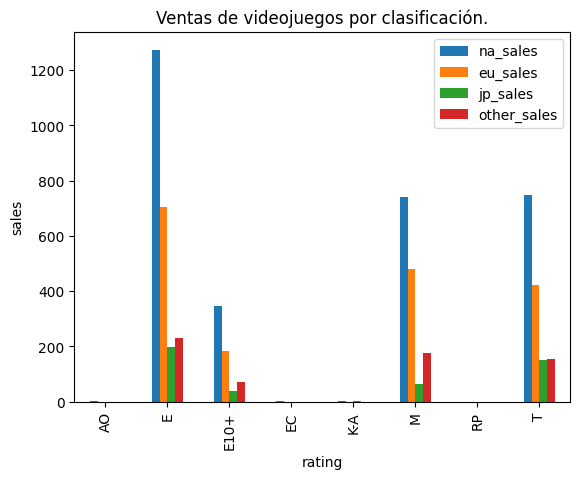

In [70]:
ax =last_merge_rating.plot(kind='bar',
                           x='rating',
                           ylabel='sales',
                           title='Ventas de videojuegos por clasificación.')

La calificaión si afectan las ventas de acuerdo donde se obtenga ese videojuego.

En Estados Unidos se venden más juegos con clasificación `E` y `T`. Al parecer a las personas le gustas jugar más estos videjuegos porque son para toda la familia.

En Europa se venden más juegos con clasificación `E` y `M`. ¿Será que en Europa cualquiera puede acceder fácilmente a juegos con claificación `M`?

En Japon, mismo caso que en Estados Unidos. Las personas disfrutan tanto los juegos `E` y `M`.

En otras regiones, las clasificación de videjuegos que más se venden son `E` y `M`.

En conclusión, los jugadores difrutan tanto como juegos familiares como de acción/violencia. Por ejemplo; Marios Bros. y Call of Duty

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios.
</div>

## Paso 5. Pruebas de hipóstesis nula.

### Las calificaciones promedio de los usuarios para las plataformas `Xbox One` y `PC` son las mismas.

In [71]:
# xbox_pc = ['XOne','PC']
# data = df_games.query("platform in @xbox_pc")
# df_games_xone_pc = pd.pivot_table(data,values = 'user_score' ,index='platform', aggfunc='mean')
# df_games_xone_pc.loc['PC','user_score']

In [72]:
mask_pc = "platform == 'PC'"
mask_xbox = "platform == 'XOne'"

df_games_pc = df_games.query(mask_pc)['user_score']
df_games_xbox = df_games.query(mask_xbox)['user_score']

variance_pc = np.var(df_games_pc)
variance_xbox = np.var(df_games_xbox)

mean_pc = df_games_pc.mean()
mean_xbox = df_games_xbox.mean()

print(f'La varianza de las calificación de jugadores para la plataforma PC es: {variance_pc:.2f}')
print(f'La varianza de las calificación de jugadores para la plataforma Xbox One es: {variance_xbox:.2f}\n\n')

print(f'EL promedio de la calificación de jugadores para la pltataforma de PC es: {mean_pc:.2f}')
print(f'EL promedio de la calificacion de jugadores para la pltataforma de Xbox One es: {mean_xbox:.2f}\n\n')

if (1-(variance_xbox/variance_pc)) <= 0.05:
    print(f'Las varianzas de los calificación de\nlos jugadres de Xbox One ({variance_xbox:.2f}) y PC ({variance_pc:.2f}) \nson aproximadamente iguales')
else:
    print(f'Las varianzas de los calificación de los jugadres\n de Xbox One ({variance_xbox:.2f}) y PC ({variance_pc:.2f}) \nno son iguales\n\n')

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(df_games_pc, df_games_xbox,equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula\n")
    

La varianza de las calificación de jugadores para la plataforma PC es: 1.88
La varianza de las calificación de jugadores para la plataforma Xbox One es: 1.58


EL promedio de la calificación de jugadores para la pltataforma de PC es: 7.16
EL promedio de la calificacion de jugadores para la pltataforma de Xbox One es: 6.78


Las varianzas de los calificación de los jugadres
 de Xbox One (1.58) y PC (1.88) 
no son iguales


valor p:  4.3968409560037004e-05
Rechazamos la hipótesis nula


Rechazamos la `Hipótesis nula` de que las calificaciones promedio de los usuarios para la plataforma `XOne` y `PC` son iguales. Por lo tanto son diferentes.

Parece que los jugadores califican mejor los juegos de `PC` que de `Xbox One`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien definiste correctamente la hipótesis y el valor de significancia antes de realizar la prueba, además se interpretó correctamente el p valor.
</div>

### Las calificaciones promedio de los usuarios para los géneros `Action` y `Sports` son diferentes.

In [73]:
mask_action = "genre == 'Action'"
mask_sports = "genre == 'Sports'"

df_games_action = df_games.query(mask_action)['user_score']
df_games_sports = df_games.query(mask_sports)['user_score']

variance_action = np.var(df_games_action)
variance_sports = np.var(df_games_sports)

mean_action = df_games_action.mean()
mean_sports = df_games_sports.mean()

print(f'La varianza de las calificación de jugadores para el género Action es: {variance_action:.2f}')
print(f'La varianza de las calificación de jugadores para el género Sports es: {variance_sports:.2f}\n\n')

print(f'EL promedio de la calificación de jugadores para el género Action es: {mean_action:.2f}')
print(f'El promedio de la calificacion de jugadores para el género Sports es: {mean_sports:.2f}\n\n')


if (1-(variance_action/variance_sports)) <= 0.05:
    print(f'Las varianzas de los calificación de\nlos jugadres de los generos Action ({variance_action:.2f}) y Sports ({variance_sports:.2f}) \nson aproximadamente iguales\n')
else:
    print(f'Las varianzas de los calificación de\nlos jugadres de los generos Action ({variance_action:.2f}) y Sports ({variance_sports:.2f}) \nno son iguales\n')
    
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(df_games_action, df_games_sports,equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula\n")
    
    

La varianza de las calificación de jugadores para el género Action es: 1.15
La varianza de las calificación de jugadores para el género Sports es: 1.30


EL promedio de la calificación de jugadores para el género Action es: 7.26
El promedio de la calificacion de jugadores para el género Sports es: 7.24


Las varianzas de los calificación de
los jugadres de los generos Action (1.15) y Sports (1.30) 
no son iguales

valor p:  0.5696868901880056
No podemos rechazar la hipótesis nula



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, aquí también definiste correctamente las hipótesis y se interpreto correctamente el p valor que sobrepasa el valor de significancia.
</div>

No podemos rechazar la `Hipótesis Nula` sobre si la calificación promedio de los usuarios para los géneros de `Action` y `Sports` son diferentes.

Esto quiere decir que aunque parezca que los promedios son iguales, de alguna forma indica que podrían ser diferentes.

En las dos hipótesis aplicamos la igualdad de las medias de dos poblaciones.

Probamos la hipótesis de que las medias de dos poblaciones son iguales según las muetras aplicadas a ellas con la función
`st.ttest_ind()`, donde los parámetros necesarios son `población_1` & `población_2` que son matrices que contien muestras y `equal_var` que es un parámetro opcional que especifica si las varianzas de las poblaciones deben considerarse iguales o no.
Para determinar si las varianzas son aproximadamente iguales las varianza no puede ser 5% mayor a la de la varianza mayor. Aplicamos una condición para determinar si son iguales o no. El resultado que se obtuvo fue que las ninguna de la varianzas de las dos hipótesis son iguales; por lo tanto `equal_var=False.`

## Conclusión General del Proyecto

En este proyecto, hemos analizado un dataset de videojuegos para identificar los patrones que determinan el éxito de un juego. Esto nos permitirá prever el éxito de futuros proyectos y planificar campañas publicitarias de manera más efectiva.

### Preparación y Visualización de Datos

Abrimos el archivo de datos, observando que las columnas necesitaban ajustes de formato. La tabla cuenta con 16,715 filas y 11 columnas, de las cuales seis tenían valores nulos. Decidimos llenar los valores nulos utilizando la mediana para evitar sesgos y mantener la integridad de la información.

### Análisis Estadístico

Identificamos varios resultados clave:
- `Need for Speed: Most Wanted` fue el juego más frecuente en 2016.
- La PS2 se convitió en consola más vendidas de la historia.
- Los jugadores prefieren los juegos de acción.
- Las calificaciones de los usuarios y críticos muestran diferentes patrones de influencia en las ventas.

### Ventas y Tendencias de Plataformas

Las ventas de videojuegos mostraron un incremento hasta 2019, cuando comenzaron a declinar. Analizamos las ventas por plataforma, destacando que `PS2` fue la consola más vendida. Las plataformas líderes para la campaña de 2017 fueron `PS4` y `XOne`.

### Correlaciones y Preferencias de Géneros

Observamos una correlación positiva entre las calificaciones de los críticos y las ventas totales, mientras que la correlación entre las calificaciones de los usuarios y las ventas totales fue negativa. Los géneros más vendidos fueron `Action`, `Shooter`, `Strategy` y `Role-Playing`.

### Análisis Regional

Determinamos las cinco plataformas y géneros principales por región. La clasificación ESRB afectó las ventas, con juegos clasificados como `E` y `M` siendo los más vendidos en diferentes regiones.

### Pruebas de Hipótesis

Rechazamos la hipótesis de que las calificaciones promedio de los usuarios para `Xbox One` y `PC` son iguales, encontrando que los juegos de `PC` son mejor calificados. No pudimos rechazar la hipótesis de que las calificaciones promedio de los géneros `Action` y `Sports` son diferentes, aunque los datos sugieren una posible diferencia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto esta bastante bien realizado, me gusto que realizaste muy bien las gráficas con las leyendas y los nombres de los ejes. Ya solo quedan un par de cambios a realizar antes de que lo pueda aprobar, uno es relativo a unos datos que eliminaste y el otro es sobre el eje en que se muestra una de las gráficas de ventas. Una vez que se realicen estos cambios podré aprobar tu proyecto. 

Éxito y 
</div>